# Installing Libraries

In [9]:
import numpy as np
import random
import string
import matplotlib.pyplot as plt
import pandas as pd
# import networkx as nx

# Basic Task

# Defining RL Problem Statement, State and Action Space

![alt text](grid_fixed.jpg "Title")

Defining a reward of 300 for reaching the gold, 200 for reaching home, and -5 for all other actions

In [90]:
# setting up state and action space
S = []
A = []
grid_dim = 5

alphabet_string = string. ascii_uppercase
for i in range(grid_dim**2):
    S.append(alphabet_string[i])
    A.append(alphabet_string[i])

# Defining R Matrix

In [91]:
# setting up reward matrix filled with NA's
number_of_states = len(S)
R =  np.empty((number_of_states, number_of_states))
R[:] = np.NaN

# checking shape of reward matrix
R.shape

(25, 25)

In [92]:
# getting all possible actions
possible_actions = []
for i in range(R.shape[0]):
    # to the right of current state
    if i % 5 != 4:
        possible_actions.append((i, i+1))
    # to the left of current state
    if i % 5 != 0:
        possible_actions.append((i, i-1))
    # to the bottom of current state
    if i < 20:
        possible_actions.append((i, i + grid_dim))
    # to the top of current state
    if i > 4:
        possible_actions.append((i, i - grid_dim))

# updating reward matrix based on possible actions and 
for i, j in possible_actions:
    if j == 12:
        R[i, j] = 300
    else:
        R[i, j] = -5

# print('R matrix:\n\n{}'.format(R))

In [93]:
# R

# Defining Q Matrix

In [94]:
Q = np.zeros(R.shape)

# print('Q matrix:\n\n{}'.format(Q))

# Learning - Single Episode

In [61]:
# defining learning hyperparameters and goal state
alpha = 1 # learning rate
gamma = 0.8 # discount rate
epsilon = 0.9 # rate of exploration vs exploitation
goal_state = "M"
final_goal_state = "U"

# setting up reward matrix filled with NA's
number_of_states = len(S)
R =  np.empty((number_of_states, number_of_states))
R[:] = np.NaN

# getting all possible actions
possible_actions = []
for i in range(R.shape[0]):
    # to the right of current state
    if i % 5 != 4:
        possible_actions.append((i, i+1))
    # to the left of current state
    if i % 5 != 0:
        possible_actions.append((i, i-1))
    # to the bottom of current state
    if i < 20:
        possible_actions.append((i, i + grid_dim))
    # to the top of current state
    if i > 4:
        possible_actions.append((i, i - grid_dim))

# updating reward matrix based on possible actions and 
for i, j in possible_actions:
    if j == 12:
        R[i, j] = 300
    else:
        R[i, j] = -5

# re-initializing Q
Q = np.zeros(R.shape)

# intialise state to E (index 4)
s = 4
print("Starting state is '{}'".format(S[s]))

cum_reward = 0

for i in range(500):
    print("Iteration Number {0}".format(i + 1))
    
    # Action selection - mapping available actions from current state
    available_actions = np.where(~np.isnan(R[s]))[0]
    print("Available actions from state '{}' are: {}".format(S[s], [A[x] for x in available_actions]))

    # mapping q values from current state
    q_values = [Q[s,a] for a in available_actions]
    print('Q values for those actions from current state: {}'.format(q_values))

    # mapping out best actions and corresponding q values from list of all q values at that current state
    best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
    best_actions_q_values = [Q[s,x] for x in best_actions]

    # will make a random choice if have multiple actions with the same estimated values
    if len(best_actions) > 1:
        print('Detected multiple actions with identical Q values. Agent will randomly select one of these.')
        print('Our best available actions from here are: {} with current q values: {}'.format(
            [A[x] for x in best_actions], best_actions_q_values))
    
    # Epsilon-greedy
    # will choose exploration if random number < epsilon - choose a random action from current set of available actions 
    if np.random.uniform() < epsilon:
        a = np.random.choice(available_actions)
        print("Selecting random action '{}' with current Q value {}".format(A[a], Q[s,a]))
        # scaling epsilon down after every iteration so that exploration is favoured for earlier iterations and scaling it down more if previously explored
        epsilon *= 0.999
    # else, will choose exploitation - choose a random action from the list of best actions (i.e. highest estimated values) 
    else:
        a = np.random.choice(best_actions)
        print("Selecting greedy action '{}' with current Q value {}".format(A[a], Q[s,a]))
        # scaling epsilon down after every iteration so that exploitation is favoured for later iterations and scaling it down less if previously exploited
        epsilon *= 0.9999
    
    print("Epsilon = {0}".format(epsilon))

    # Environment updating
    r = R[s,a]
    print("Reward for taking action '{}' from state '{}': {}".format(A[a], S[s], r))

    s_old = s
    s = a # here, the transition function is deterministic. Next state corresponds simply to the action taken.
    print("After taking action '{}' from state '{}', new state is '{}'".format(A[a], S[s_old], S[s]))

    # Q value updating
    
    q_updated = Q[s_old,a] + alpha * (R[s_old,a] + gamma * np.max(Q[s,:]) - Q[s_old,a])
    Q[s_old,a] = q_updated

    print("Q value update: " \
          "Q({},{}) = Q({},{}) + alpha*(r({},{}) + gamma*max(Q[{},:]) - Q[{},{}])\n".format(
        S[s_old], A[a], S[s_old], A[a], S[s_old], A[a], S[s],S[s_old], A[a]))

#     print("Q matrix update: " \
#           "Q({},{}) = {} + {}*({} + {}*{} - {}) = {}".format(
#         S[s_old], A[a], Q[s_old,a].round(0), alpha, r, gamma, np.max(Q[s,:]).round(0), 
#         Q[s_old,a].round(0), q_updated))
    
    cum_reward += r

#     print("Current reward = {}".format(cum_reward))

#     print('Q matrix updated: \n\n {}'.format(Q.round(0)))
    
    # if arrive at M then change reward to -5
    if A[a] == "M" and r == 300:
        R[7,12] = -5
        R[11,12] = -5
        R[13,12] = -5
        R[17,12] = -5

        for i,j in possible_actions:
            if j==20:
                R[i,j] = 200
        goal_state="U"
    
    if S[s] == final_goal_state:
        print("Goal state '{}' reached. Ending episode.".format(final_goal_state))
        print("Final Reward = {}".format(cum_reward))
        break


Starting state is 'E'
Iteration Number 1
Available actions from state 'E' are: ['D', 'J']
Q values for those actions from current state: [0.0, 0.0]
Detected multiple actions with identical Q values. Agent will randomly select one of these.
Our best available actions from here are: ['D', 'J'] with current q values: [0.0, 0.0]
Selecting random action 'D' with current Q value 0.0
Epsilon = 0.8991
Reward for taking action 'D' from state 'E': -5.0
After taking action 'D' from state 'E', new state is 'D'
Q value update: Q(E,D) = Q(E,D) + alpha*(r(E,D) + gamma*max(Q[D,:]) - Q[E,D])

Iteration Number 2
Available actions from state 'D' are: ['C', 'E', 'I']
Q values for those actions from current state: [0.0, 0.0, 0.0]
Detected multiple actions with identical Q values. Agent will randomly select one of these.
Our best available actions from here are: ['C', 'E', 'I'] with current q values: [0.0, 0.0, 0.0]
Selecting random action 'C' with current Q value 0.0
Epsilon = 0.8982009
Reward for taking a

# Learning - Until Convergence

In [109]:
# setting up lists to store performance metrics
avg_cum_reward_list = []
avg_num_episodes_list = []
cum_reward = 0
num_iter = 0

# defining learning hyperparameters and goal state
alpha = 1 # learning rate
gamma = 0.8 # discount rate
epsilon = 0.9 # rate of exploration vs exploitation
final_goal_state = "U"

num_episodes = 1000

# re-initializing Q
Q = np.zeros(R.shape)

# Run for episodes
# run it for 1000 episodes and in each episode, have 500 steps to reach goal state - if not, move on to next episode
for episode in range(num_episodes):
    
    # initialising state to E (index 4)
    s = 4
#     print("Starting state is '{}'".format(S[s]))
    
    goal_state="M"
    
    # re-initialising reward matrix
    # updating reward matrix based on possible actions and 
    for i, j in possible_actions:
        if j == 12:
            R[i, j] = 300
        else:
            R[i, j] = -5
    
    
    # have 500 steps to reach goal state
    for timestep in range(500):
        # Action selection
        available_actions = np.where(~np.isnan(R[s]))[0]
        q_values = [Q[s,a] for a in available_actions]
        best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
        best_actions_q_values = [Q[s,x] for x in best_actions]
        
        # Epsilon-greedy
        # will choose exploration if random number < epsilon - choose a random action from current set of available actions 
        if np.random.uniform() < epsilon:
            a = np.random.choice(available_actions)
            # scaling epsilon down after every iteration so that exploration is favoured for earlier iterations and scaling it down more if previously explored
            epsilon *= 0.999
        # else, will choose exploitation - choose a random action from the list of best actions (i.e. highest estimated values) 
        else:
            a = np.random.choice(best_actions)
            # scaling epsilon down after every iteration so that exploitation is favoured for later iterations and scaling it down less if previously exploited
            epsilon *= 0.9999

        # Environment updating
        r = R[s,a]
        s_old = s
        s = a 
        
        # Q value updating
        # np.max(Q[s,:]) looks at the q values at the new state as compared to q_values which looked at q values at our old state
        Q[s_old,a] = Q[s_old,a] + alpha * (R[s_old,a] + gamma * np.max(Q[s,:]) - Q[s_old,a])
        
        # if arrive at M then change reward to -5
        if A[a] == "M" and r == 300:
            R[7,12] = -5
            R[11,12] = -5
            R[13,12] = -5
            R[17,12] = -5

            for i,j in possible_actions:
                if j==20:
                    R[i,j] = 200
            goal_state="U"

        # tallying cumulative reward
        cum_reward += r
        
        if S[s] == final_goal_state:
            break
    
    num_iter += timestep + 1
    avg_cum_reward_list.append(cum_reward/(episode + 1))
    avg_num_episodes_list.append(num_iter/(episode + 1))
    if episode % 100 == 0: 
        print('Episode {} finished.'.format(episode + 1))
#     print('Episode {} finished. Q matrix values:\n{}'.format(episode + 1,Q.round(1)))

Episode 1 finished.
Episode 101 finished.
Episode 201 finished.
Episode 301 finished.
Episode 401 finished.
Episode 501 finished.
Episode 601 finished.
Episode 701 finished.
Episode 801 finished.
Episode 901 finished.


# Plotting Average Cumulative Reward and Average Number of Steps Per Episode

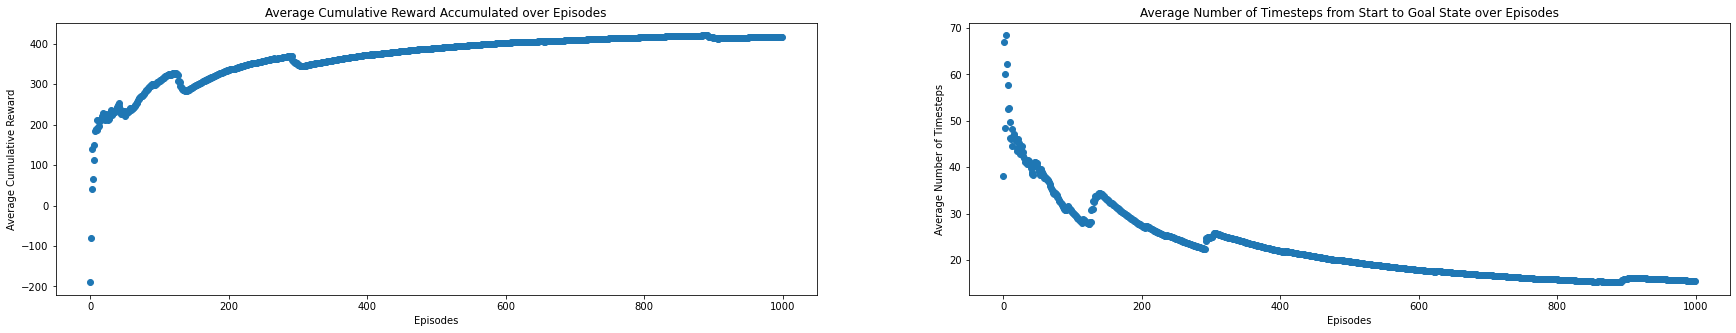

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 5))
ax1.scatter(range(num_episodes), avg_cum_reward_list)
ax2.scatter(range(num_episodes), avg_num_episodes_list)
ax1.set(xlabel="Episodes", ylabel="Average Cumulative Reward", title="Average Cumulative Reward Accumulated over Episodes")
ax2.set(xlabel="Episodes", ylabel="Average Number of Timesteps", title = "Average Number of Timesteps from Start to Goal State over Episodes")
plt.show()

# Hyperparameter Tuning - Varying Alpha

In [95]:
# defining learning hyperparameters and goal state
alpha_list = [0, 0.5, 1] # set of learning rates
gamma = 0.8 # discount rate
epsilon = 0.9 # rate of exploration vs exploitation
alpha_avg_cum_reward_lists = []
alpha_avg_num_episodes_lists = []
rate_of_goal_achieved_list = []
final_goal_state = "U"

# re-initializing Q
Q = np.zeros(R.shape)


# iterating over each alpha and gamma
for alpha in alpha_list:
        
    # setting up lists to store performance metrics
    avg_cum_reward_list = []
    avg_num_episodes_list = []
    cum_reward = 0
    num_iter = 0
    goal_achieved = 0

    # Run for episodes
    # run it for 1000 episodes and in each episode, have 500 steps to reach goal state - if not, move on to next episode
    for episode in range(num_episodes):

        # initialising starting state to E (index 4)
        s = 4

        goal_state = "M"
        
        # re-initialising reward matrix
        # updating reward matrix based on possible actions and 
        for i, j in possible_actions:
            if j == 12:
                R[i, j] = 300
            else:
                R[i, j] = -5
        
        # have 500 steps to reach goal state
        for timestep in range(500):
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            # Epsilon-greedy
            # will choose exploration if random number < epsilon - choose a random action from current set of available actions 
            if  np.random.uniform() < epsilon:
                a = np.random.choice(available_actions)
                # scaling epsilon down after every iteration so that exploration is favoured for earlier iterations and scaling it down more if previously explored
                epsilon *= 0.999
            # else, will choose exploitation - choose a random action from the list of best actions (i.e. highest estimated values) 
            else:
                a = np.random.choice(best_actions)
                # scaling epsilon down after every iteration so that exploitation is favoured for later iterations and scaling it down less if previously exploited
                epsilon *= 0.9999

            # Environment updating
            r = R[s,a]
            s_old = s
            s = a 

            # Q value updating
            # np.max(Q[s,:]) looks at the q values at the new state as compared to q_values which looked at q values at our old state
            Q[s_old,a] = Q[s_old,a] + alpha * (R[s_old,a] + gamma * np.max(Q[s,:]) - Q[s_old,a])

            # if arrive at M then change reward to -5
            if A[a] == "M" and r == 300:
                R[7,12] = -5
                R[11,12] = -5
                R[13,12] = -5
                R[17,12] = -5
                
                for i,j in possible_actions:
                    if j==20:
                        R[i,j] = 200
                goal_state="U"
            

            # tallying cumulative reward
            cum_reward += r
            
            if S[s] == final_goal_state:
                goal_achieved += 1
                break

        num_iter += timestep + 1
        avg_cum_reward_list.append(cum_reward/(episode + 1))
        avg_num_episodes_list.append(num_iter/(episode + 1))

    rate_of_goal_achieved_list.append(goal_achieved/num_episodes)
    alpha_avg_cum_reward_lists.append(avg_cum_reward_list)
    alpha_avg_num_episodes_lists.append(avg_num_episodes_list)
print("Done")

Done


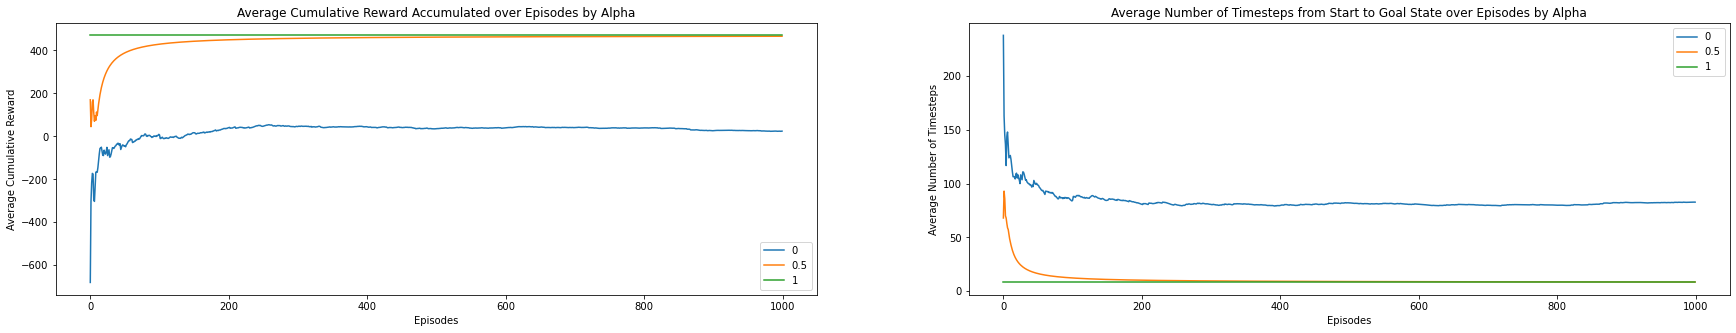

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 5))
for reward_list in alpha_avg_cum_reward_lists:
    ax1.plot(range(num_episodes), reward_list)

for episode_list in alpha_avg_num_episodes_lists:
    ax2.plot(range(num_episodes), episode_list)
    
# ax2.scatter(range(num_episodes), avg_num_episodes_list)
ax1.set(xlabel="Episodes", ylabel="Average Cumulative Reward", title="Average Cumulative Reward Accumulated over Episodes by Alpha")
ax2.set(xlabel="Episodes", ylabel="Average Number of Timesteps", title = "Average Number of Timesteps from Start to Goal State over Episodes by Alpha")
ax1.legend(labels=alpha_list)
ax2.legend(labels=alpha_list)
plt.show()

# Hyperparameter Tuning - Varying Gamma

In [97]:
# defining learning hyperparameters and goal state
alpha = 1 # learning rate
gamma_list = [0, 0.5, 1] # set of discount rates
epsilon = 0.9 # rate of exploration vs exploitation
gamma_avg_cum_reward_lists = []
gamma_avg_num_episodes_lists = []
rate_of_goal_achieved_list = []
final_goal_state = "U"

# re-initializing Q
Q = np.zeros(R.shape)


# iterating over each alpha and gamma
for alpha in alpha_list:
        
    # setting up lists to store performance metrics
    avg_cum_reward_list = []
    avg_num_episodes_list = []
    cum_reward = 0
    num_iter = 0
    goal_achieved = 0

    # Run for episodes
    # run it for 1000 episodes and in each episode, have 500 steps to reach goal state - if not, move on to next episode
    for episode in range(num_episodes):

        # initialising starting state to E (index 4)
        s = 4

        goal_state = "M"
        
        # re-initialising reward matrix
        # updating reward matrix based on possible actions and 
        for i, j in possible_actions:
            if j == 12:
                R[i, j] = 300
            else:
                R[i, j] = -5
        
        # have 500 steps to reach goal state
        for timestep in range(500):
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            # Epsilon-greedy
            # will choose exploration if random number < epsilon - choose a random action from current set of available actions 
            if  np.random.uniform() < epsilon:
                a = np.random.choice(available_actions)
                # scaling epsilon down after every iteration so that exploration is favoured for earlier iterations and scaling it down more if previously explored
                epsilon *= 0.999
            # else, will choose exploitation - choose a random action from the list of best actions (i.e. highest estimated values) 
            else:
                a = np.random.choice(best_actions)
                # scaling epsilon down after every iteration so that exploitation is favoured for later iterations and scaling it down less if previously exploited
                epsilon *= 0.9999

            # Environment updating
            r = R[s,a]
            s_old = s
            s = a 

            # Q value updating
            # np.max(Q[s,:]) looks at the q values at the new state as compared to q_values which looked at q values at our old state
            Q[s_old,a] = Q[s_old,a] + alpha * (R[s_old,a] + gamma * np.max(Q[s,:]) - Q[s_old,a])

            # if arrive at M then change reward to -5
            if A[a] == "M" and r == 300:
                R[7,12] = -5
                R[11,12] = -5
                R[13,12] = -5
                R[17,12] = -5
                
                for i,j in possible_actions:
                    if j==20:
                        R[i,j] = 200
                goal_state="U"
            

            # tallying cumulative reward
            cum_reward += r

            if S[s] == final_goal_state:
                goal_achieved += 1
                break

        num_iter += timestep + 1
        avg_cum_reward_list.append(cum_reward/(episode + 1))
        avg_num_episodes_list.append(num_iter/(episode + 1))

    rate_of_goal_achieved_list.append(goal_achieved/num_episodes)
    gamma_avg_cum_reward_lists.append(avg_cum_reward_list)
    gamma_avg_num_episodes_lists.append(avg_num_episodes_list)
print("Done")

Done


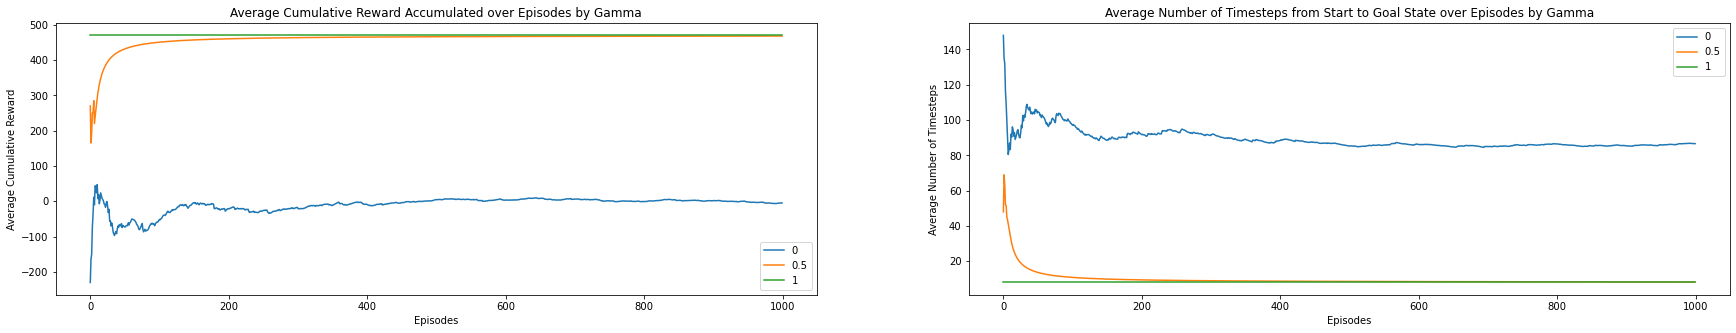

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 5))

for reward_list in gamma_avg_cum_reward_lists:
    ax1.plot(range(num_episodes), reward_list)

for episode_list in gamma_avg_num_episodes_lists:
    ax2.plot(range(num_episodes), episode_list)
    
# ax2.scatter(range(num_episodes), avg_num_episodes_list)
ax1.set(xlabel="Episodes", ylabel="Average Cumulative Reward", title="Average Cumulative Reward Accumulated over Episodes by Gamma")
ax2.set(xlabel="Episodes", ylabel="Average Number of Timesteps", title = "Average Number of Timesteps from Start to Goal State over Episodes by Gamma")
ax1.legend(labels=gamma_list)
ax2.legend(labels=gamma_list)
plt.show()

# Hyperparameter Tuning - Varying Rate of Decay

In [99]:
# defining learning hyperparameters and goal state
alpha = 1 # learning rate
gamma = 0.8 # discount rate
epsilon = 0.9 # rate of exploration vs exploitation
scalar_list = [(0.099, 0.0999), (0.999, 0.9999)] # list of rates of decay
scalar_avg_cum_reward_lists = []
scalar_avg_num_episodes_lists = []
rate_of_goal_achieved_list = []
final_goal_state = "U"

# re-initializing Q
Q = np.zeros(R.shape)


# iterating over each alpha and gamma
for scalar_explore, scalar_exploit in scalar_list:
        
    # setting up lists to store performance metrics
    avg_cum_reward_list = []
    avg_num_episodes_list = []
    cum_reward = 0
    num_iter = 0
    goal_achieved = 0

    # Run for episodes
    # run it for 1000 episodes and in each episode, have 500 steps to reach goal state - if not, move on to next episode
    for episode in range(num_episodes):

        # initialising starting state to E (index 4)
        s = 4

        goal_state = "M"
        
        # re-initialising reward matrix
        # updating reward matrix based on possible actions and 
        for i, j in possible_actions:
            if j == 12:
                R[i, j] = 300
            else:
                R[i, j] = -5
        
        # have 500 steps to reach goal state
        for timestep in range(500):
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            # Epsilon-greedy
            # will choose exploration if random number < epsilon - choose a random action from current set of available actions 
            if  np.random.uniform() < epsilon:
                a = np.random.choice(available_actions)
                # scaling epsilon down after every iteration so that exploration is favoured for earlier iterations and scaling it down more if previously explored
                epsilon *= scalar_explore
            # else, will choose exploitation - choose a random action from the list of best actions (i.e. highest estimated values) 
            else:
                a = np.random.choice(best_actions)
                # scaling epsilon down after every iteration so that exploitation is favoured for later iterations and scaling it down less if previously exploited
                epsilon *= scalar_exploit

            # Environment updating
            r = R[s,a]
            s_old = s
            s = a 

            # Q value updating
            # np.max(Q[s,:]) looks at the q values at the new state as compared to q_values which looked at q values at our old state
            Q[s_old,a] = Q[s_old,a] + alpha * (R[s_old,a] + gamma * np.max(Q[s,:]) - Q[s_old,a])

            # if arrive at M then change reward to -5
            if A[a] == "M" and r == 300:
                R[7,12] = -5
                R[11,12] = -5
                R[13,12] = -5
                R[17,12] = -5
                
                for i,j in possible_actions:
                    if j==20:
                        R[i,j] = 200
                goal_state="U"
            

            # tallying cumulative reward
            cum_reward += r

            if S[s] == final_goal_state:
                goal_achieved += 1
                break

        num_iter += timestep + 1
        avg_cum_reward_list.append(cum_reward/(episode + 1))
        avg_num_episodes_list.append(num_iter/(episode + 1))

    rate_of_goal_achieved_list.append(goal_achieved/num_episodes)
    scalar_avg_cum_reward_lists.append(avg_cum_reward_list)
    scalar_avg_num_episodes_lists.append(avg_num_episodes_list)
print("Done")

Done


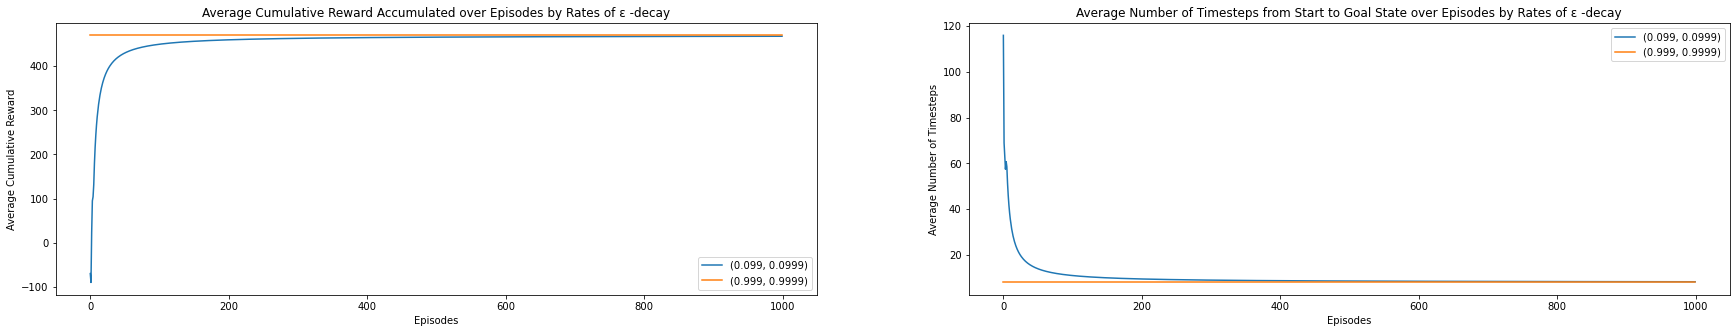

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 5))

for reward_list in scalar_avg_cum_reward_lists:
    ax1.plot(range(num_episodes), reward_list)

for episode_list in scalar_avg_num_episodes_lists:
    ax2.plot(range(num_episodes), episode_list)
    
# ax2.scatter(range(num_episodes), avg_num_episodes_list)
ax1.set(xlabel="Episodes", ylabel="Average Cumulative Reward", title="Average Cumulative Reward Accumulated over Episodes by Rates of ε -decay")
ax2.set(xlabel="Episodes", ylabel="Average Number of Timesteps", title = "Average Number of Timesteps from Start to Goal State over Episodes by Rates of ε -decay")
ax1.legend(labels=scalar_list)
ax2.legend(labels=scalar_list)
plt.show()

# Hyperparameter Tuning - Alpha, Gamma, and Rate of Decay

In [101]:
# defining learning hyperparameters and goal state
alpha_list = [0, 0.5, 1] # learning rate
gamma_list = [0, 0.5, 1] # set of discount rates
scalar_list = [(0.099, 0.0999), (0.999, 0.9999)] # list of rates of decay
epsilon = 0.9 # rate of exploration vs exploitation
avg_cum_reward_list = []
avg_num_timesteps_list = []
rate_of_goal_achieved_list = []
alphas = []
gammas = []
rates_of_decay = []
final_goal_state = "U"

# re-initializing Q
Q = np.zeros(R.shape)


# iterating over each alpha, gamma and rates of decay
for alpha in alpha_list:
    for gamma in gamma_list:
        for scalar_explore, scalar_exploit in scalar_list:
            alphas.append(alpha)
            gammas.append(gamma)
            rates_of_decay.append((scalar_explore, scalar_exploit))

            # setting up lists to store performance metrics
            cum_reward = 0
            num_iter = 0
            goal_achieved = 0

            # Run for episodes
            # run it for 1000 episodes and in each episode, have 500 steps to reach goal state - if not, move on to next episode
            for episode in range(num_episodes):

                # initialising starting state to E (index 4)
                s = 4

                goal_state = "M"

                # re-initialising reward matrix
                # updating reward matrix based on possible actions and 
                for i, j in possible_actions:
                    if j == 12:
                        R[i, j] = 300
                    else:
                        R[i, j] = -5

                # have 500 steps to reach goal state
                for timestep in range(500):
                    # Action selection
                    available_actions = np.where(~np.isnan(R[s]))[0]
                    q_values = [Q[s,a] for a in available_actions]
                    best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
                    best_actions_q_values = [Q[s,x] for x in best_actions]

                    # Epsilon-greedy
                    # will choose exploration if random number < epsilon - choose a random action from current set of available actions 
                    if  np.random.uniform() < epsilon:
                        a = np.random.choice(available_actions)
                        # scaling epsilon down after every iteration so that exploration is favoured for earlier iterations and scaling it down more if previously explored
                        epsilon *= scalar_explore
                    # else, will choose exploitation - choose a random action from the list of best actions (i.e. highest estimated values) 
                    else:
                        a = np.random.choice(best_actions)
                        # scaling epsilon down after every iteration so that exploitation is favoured for later iterations and scaling it down less if previously exploited
                        epsilon *= scalar_exploit

                    # Environment updating
                    r = R[s,a]
                    s_old = s
                    s = a 

                    # Q value updating
                    # np.max(Q[s,:]) looks at the q values at the new state as compared to q_values which looked at q values at our old state
                    Q[s_old,a] = Q[s_old,a] + alpha * (R[s_old,a] + gamma * np.max(Q[s,:]) - Q[s_old,a])

                    # if arrive at M then change reward to -5
                    if A[a] == "M" and r == 300:
                        R[7,12] = -5
                        R[11,12] = -5
                        R[13,12] = -5
                        R[17,12] = -5

                        for i,j in possible_actions:
                            if j==20:
                                R[i,j] = 200
                        goal_state="U"


                    # tallying cumulative reward
                    cum_reward += r

                    if S[s] == final_goal_state:
                        goal_achieved += 1
                        break

                num_iter += timestep + 1

            rate_of_goal_achieved_list.append(goal_achieved/num_episodes)
            avg_cum_reward_list.append(cum_reward/num_episodes)
            avg_num_timesteps_list.append(num_iter/num_episodes)


#create dataframe to store results     
dataset = {'Alpha': alphas, 'Gamma': gammas, 'Rates of Epsilon Decay (Explore, Exploit)': rates_of_decay, 'Average Cummulative Reward': avg_cum_reward_list, 'Average Number of Episodes': avg_num_timesteps_list, 'Rate of Reaching Goal State': rate_of_goal_achieved_list}
df_hyper_grid = pd.DataFrame(dataset)
df_hyper_grid

,Alpha,Gamma,"Rates of Epsilon Decay (Explore, Exploit)",Average Cummulative Reward,Average Number of Episodes,Rate of Reaching Goal State
0,0.0,0.0,"(0.099, 0.0999)",17.445,79.600,0.999
1,0.0,0.0,"(0.999, 0.9999)",13.055,83.946,0.999
2,0.0,0.5,"(0.099, 0.0999)",4.640,84.262,0.998
3,0.0,0.5,"(0.999, 0.9999)",5.580,86.604,1.000
4,0.0,1.0,"(0.099, 0.0999)",-6.860,86.174,0.996
5,0.0,1.0,"(0.999, 0.9999)",20.540,81.878,1.000
6,0.5,0.0,"(0.099, 0.0999)",268.850,42.212,1.000
7,0.5,0.0,"(0.999, 0.9999)",269.025,43.380,0.997
8,0.5,0.5,"(0.099, 0.0999)",467.350,8.530,1.000
9,0.5,0.5,"(0.999, 0.9999)",470.000,8.000,1.000


# Advanced Task

# Setting up the Environment - CartPole

In [2]:
import gym
env = gym.make('CartPole-v0')

# State Space 

In [3]:
obs_space_high = env.observation_space.high
obs_space_low = env.observation_space.low

pd.DataFrame([obs_space_high, obs_space_low], index=["High", "Low"], columns=["Cart Position (x-position)", "Cart Velocity", "Pole Angle (radians)", "Pole Angular Velocity"])

,Cart Position (x-position),Cart Velocity,Pole Angle (radians),Pole Angular Velocity
High,4.8,3.402823e+38,0.418879,3.402823e+38
Low,-4.8,-3.402823e+38,-0.418879,-3.402823e+38


Observations of the states consist of 4 metrics: Cart Position, Cart Velocity, Pole Angle and Pole Angular Velocity.

Table above also shows the bounds of each value.

# Action Space 

In [4]:
print("Number of actions available: {0}".format(env.action_space.n))

Number of actions available: 2


Action space consists of 2 actions: move left (corresponding to 0) or right (corresponding to 1)

# Testing the Environment

Text(0.5, 1.0, 'Accumulated Reward by Episodes')

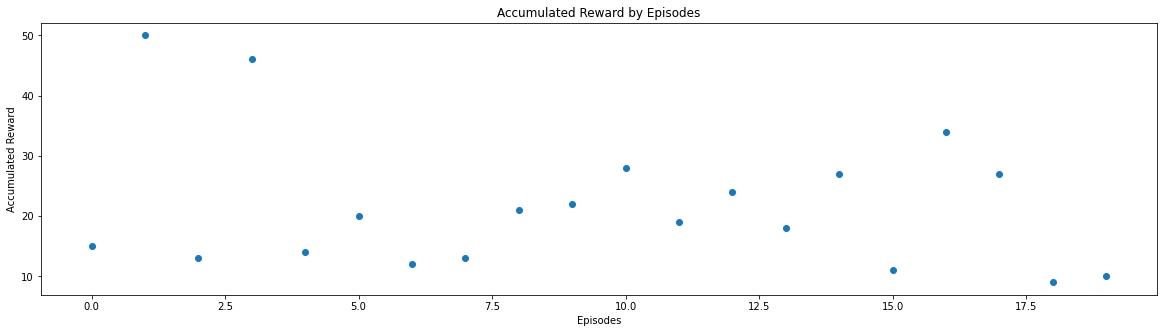

In [5]:
accum_reward_list = []
num_episodes = 20

# taking random actions until terminal over 20 episodes
for episode in range(num_episodes):
    observation, done, accum_reward = env.reset(), False, 0
    while done != True:
        env.render()
        action = env.action_space.sample() # taking a random action, sampled from the action space
        observation, reward, done, info = env.step(action) # recording the observation, reward and if we're done for the episode
        accum_reward += reward # sum up the rewards
    accum_reward_list.append(accum_reward) # append it onto list of rewards for each episode
    

# plotting the rewards by episodes
fig = plt.figure(figsize=(20, 5))
plt.scatter(range(num_episodes), accum_reward_list)
plt.xlabel("Episodes")
plt.ylabel("Accumulated Reward")
plt.title("Accumulated Reward by Episodes")

# Setting up Q-Network

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DQN(nn.Module):

    def __init__(self, input_size, size_hidden, output_size):
        
        super().__init__()
        # Q-network with 2 layers: 1 hidden and 1 output layer
        self.fc1 = nn.Linear(input_size, size_hidden)   
        self.out = nn.Linear(size_hidden, output_size)   
        
    def forward(self, x):
        h1 = F.relu(self.fc1(x)) # input to hidden layer 1
        output = self.out(h1) # hidden layer 1 to output
        return output

# Setting up Replay Memory

In [4]:
from collections import namedtuple

Experience = namedtuple('Experience', ('state', 'action', 'next_state', 'reward'))

In [5]:
class ReplayMemory:

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.push_count = 0 # to tally the number of the experiences saved 

    def push(self, experience):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(experience) # if there's capacity, save the experience
        else:
            self.memory[self.push_count % self.capacity] = experience # else, replace the oldest experience with a new one
        self.push_count += 1 # update number of experiences saved

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size) # randomly sample a batch_size number of experiences

    def memory_initialised(self):
        return len(self.memory) == self.capacity
    
    def able_to_sample(self, batch_size):
        return len(self.memory) > batch_size # checks to see if we have sufficient experiences to sample a batch of experiences
    
    def memory_length(self):
        return len(self.memory)
    
    def get_batches(self, experiences):
        batch = Experience(*zip(*experiences))
        
        # Compute a mask of non-final states and concatenate the batch elements
        non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), device=device, dtype=torch.bool)
        next_state_batch = torch.cat([s for s in batch.next_state if s is not None])
        
        state_batch = torch.cat(batch.state)
        action_batch = torch.cat(batch.action).unsqueeze(1)
        reward_batch = torch.cat(batch.reward).unsqueeze(1)
        
        return state_batch, action_batch, reward_batch, non_final_mask, next_state_batch

# Setting up Epsilon Greedy Policy

In [6]:
class E_Greedy_Policy:
    
    def __init__(self, epsilon, min_epsilon, decay):
        
        self.epsilon = epsilon
        self.epsilon_start = epsilon
        self.epsilon_min = min_epsilon
        self.decay = decay
                
    def update_epsilon(self):
        
        self.epsilon = self.epsilon*self.decay
        if self.epsilon < self.epsilon_min:
            self.epsilon = self.epsilon_min
    
    def reset(self):
        self.epsilon = self.epsilon_start # reset epsilon

# Setting up Agent

In [7]:
class Agent:
    
    def __init__(self, behaviour_policy, num_actions):
        self.behaviour_policy = behaviour_policy
        self.num_actions = num_actions
        
    def select_action(self, state, policy_network): 
        if  np.random.uniform() < self.behaviour_policy.epsilon: # explore
            return random.randrange(self.num_actions) # select random action
        else:                                                    # exploit
            with torch.no_grad():
                return policy_network(torch.from_numpy(state).unsqueeze(0)).argmax(dim=1).item() # select greedy action
    
    
    def optimise_model(self, policy_network, optimizer, state_batch, action_batch, reward_batch, non_final_mask, next_state_batch):
        # compute Q_values
        Q_values = policy_network(state_batch).gather(1, action_batch)
        
        # Compute next Q values
        next_Q_values = torch.zeros( BATCH_SIZE, device=device)
        next_Q_values[non_final_mask] = policy_network(next_state_batch).max(1)[0].detach()
        next_Q_values = next_Q_values.unsqueeze(1)
        
        # Compute targets
        target_Q_values = (next_Q_values * GAMMA) + reward_batch
    
        # Compute MSE Loss
        loss = F.mse_loss(Q_values, target_Q_values)
    
        # Optimise the model
        optimizer.zero_grad()
        loss.backward()
    
        # gradient clipping to ensure stability 
        for param in policy_network.parameters():
            param.grad.data.clamp_(-1, 1)
        
        optimizer.step()

# Setting Up Hyperparameters and Creating Instances of Classes

In [85]:
# specifying hyperparameters
num_episodes = 1000
CAPACITY = 100000
BATCH_SIZE = 256
GAMMA = 0.999
HIDDEN_SIZE = 64
TARGET_UPDATE = 10

# creating instances of classes
env = gym.make('CartPole-v0') # creating environment
num_states = env.observation_space.shape[0] # number of states = size of observation spae
num_actions = env.action_space.n # number of actions = size of action space

policy_network = DQN(num_states, HIDDEN_SIZE, num_actions).to(device) # creating policy network: 2 layered DQN with 1 hidden layer with 64 neurons

optimizer = optim.Adam(policy_network.parameters(), lr=0.01) # using ADAM as optimizer
behaviour_policy = E_Greedy_Policy(1, 0.001, 0.999) # epsilon greedy policy with starting epsilon of 1, minimum epsilon of 0.001 and decay by 0.999 each episode
memory = ReplayMemory(CAPACITY) # memory with capacity of 10,000
agent = Agent(behaviour_policy, num_actions) # setting up agent with epsilon greedy policy and number of actions it can take

# Initialising Memory

In [86]:
# Initialising memory to our capacity
while not memory.memory_initialised():
    state = env.reset() # reset the environment for each episode
    done = False 
    while not done:
        action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
        next_state, reward, done, _ = env.step(action) # take the action in the environment 
        # Observe new state
        if done:
            next_state = None
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # creating experience tuple if next state is None
        else:
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
        memory.push(experience) # Store the transition in memory
        state = next_state # move to next state
print('Done with intialising the memory')

Done with intialising the memory


# Implementing Vanilla DQN

Done training


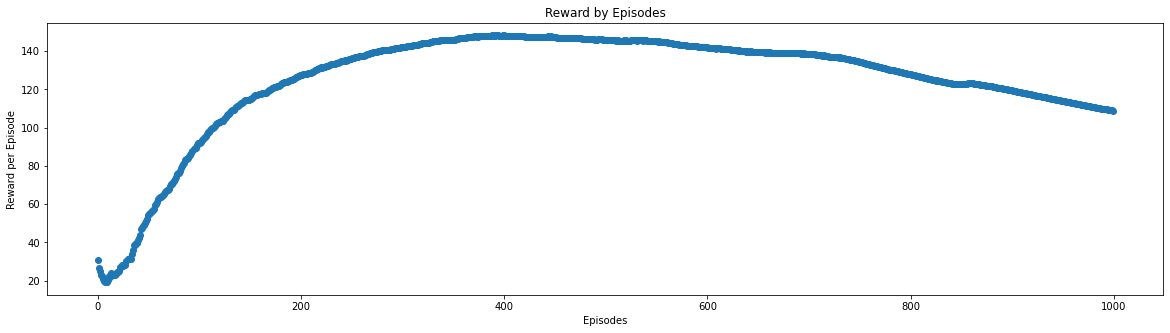

In [87]:
reward_list = []
total_reward = 0

# iterate over num_episodes number of episodes
for episode in range(num_episodes):
    state = env.reset() # reset the environment for each episode
    done = False 
    while not done:
#         env.render()
        action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
        next_state, reward, done, _ = env.step(action) # take the action in the environment 
        total_reward += reward
        # Observe new state
        if done:
            next_state = None
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # account for if next state is None
        else:
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
        memory.push(experience) # Store the transition in memory
        state = next_state # move to next state 
        
        # optimize the model by updating the weights
        # sample from memory of experiences
        sample_experiences = memory.sample(BATCH_SIZE)
        state_batch, action_batch, reward_batch, non_final_mask, next_state_batch = memory.get_batches(sample_experiences)
        # get q-values, next state q-values and update weights
        agent.optimise_model(policy_network, optimizer, state_batch, action_batch, reward_batch, non_final_mask, next_state_batch) 
        behaviour_policy.update_epsilon() # epsilon decay
    reward_list.append(total_reward/(episode+1)) # store reward to plot
print("Done training")
env.close()

# plotting the rewards by episodes
fig = plt.figure(figsize=(20, 5))
plt.scatter(range(num_episodes), reward_list)
plt.xlabel("Episodes")
plt.ylabel("Reward per Episode")
plt.title("Reward by Episodes")
plt.show()

# Implementing Dual Network

## Agent

In [44]:
class dual_agent:
    
    def __init__(self, behaviour_policy, num_actions):
        self.behaviour_policy = behaviour_policy
        self.num_actions = num_actions
        
    def select_action(self, state, policy_network): 
        if  np.random.uniform() < self.behaviour_policy.epsilon: # explore
            return random.randrange(self.num_actions) # select random action
        else:  # exploit
            with torch.no_grad():
                return policy_network(torch.from_numpy(state).unsqueeze(0)).argmax(dim=1).item() # select greedy action
    
    
    def optimise_model(self, policy_network, target_network, optimizer, state_batch, action_batch, reward_batch, non_final_mask, next_state_batch):
        # compute Q_values
        Q_values = policy_network(state_batch).gather(1, action_batch)
        
        # Compute next Q values
        next_Q_values = torch.zeros( BATCH_SIZE, device=device)
        next_Q_values[non_final_mask] = target_network(next_state_batch).max(1)[0].detach()
        next_Q_values = next_Q_values.unsqueeze(1)
        
        # Compute targets
        target_Q_values = (next_Q_values * GAMMA) + reward_batch
    
        # Compute MSE Loss
        loss = F.mse_loss(Q_values, target_Q_values)
    
        # Optimise the model
        optimizer.zero_grad()
        loss.backward()
    
        # gradient clipping to ensure stability 
        for param in policy_network.parameters():
            param.grad.data.clamp_(-1, 1)
        
        optimizer.step()

## Hyperparameters and Instances of Classes

In [74]:
# specifying hyperparameters
num_episodes = 1000
CAPACITY = 100000
BATCH_SIZE = 256
GAMMA = 0.999
HIDDEN_SIZE = 64
TARGET_UPDATE = 10

# creating instances of classes
env = gym.make('CartPole-v0') # creating environment
num_states = env.observation_space.shape[0] # number of states = size of observation spae
num_actions = env.action_space.n # number of actions = size of action space

policy_network = DQN(num_states, HIDDEN_SIZE, num_actions).to(device) # creating policy network: 2 layered DQN with 1 hidden layer with 64 neurons

target_network = DQN(num_states, HIDDEN_SIZE, num_actions).to(device) # creating target network
target_network.load_state_dict(policy_network.state_dict()) # set weights of target network to be the same as policy_network
target_network.eval() # set to evaluation mode

optimizer = optim.Adam(policy_network.parameters(), lr=0.01) # using ADAM as optimizer
behaviour_policy = E_Greedy_Policy(1, 0.001, 0.999) # epsilon greedy policy with starting epsilon of 1, minimum epsilon of 0.001 and decay by 0.999 each episode
memory = ReplayMemory(CAPACITY) # memory with capacity of 10,000
agent = dual_agent(behaviour_policy, num_actions) # setting up agent with epsilon greedy policy and number of actions it can take

## Re-Initialising Memory

In [75]:
# Initialising memory to our capcity
while not memory.memory_initialised():
    state = env.reset() # reset the environment for each episode
    done = False 
    while not done:
        action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
        next_state, reward, done, _ = env.step(action) # take the action in the environment 
        # Observe new state
        if done:
            next_state = None
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # creating experience tuple if next state is None
        else:
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
        memory.push(experience) # Store the transition in memory
        state = next_state # move to next state
print('Done with intialising the memory')

Done with intialising the memory


## Training

Done training


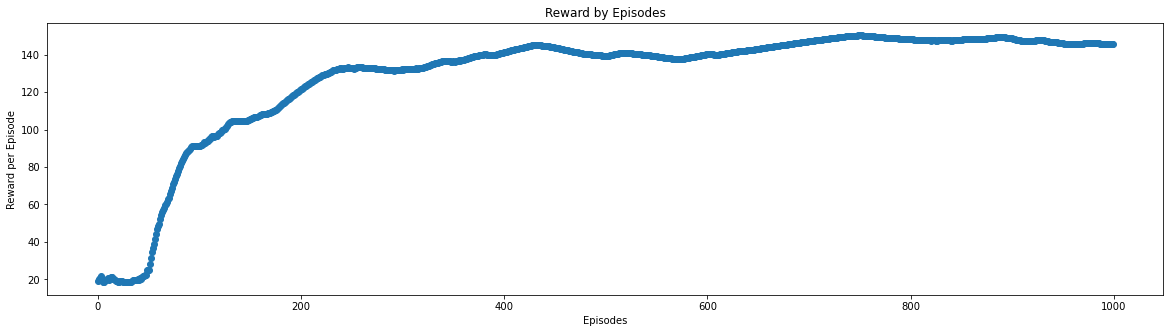

In [76]:
reward_list_double = []
total_reward = 0

# iterate over num_episodes number of episodes
for episode in range(num_episodes):
    state = env.reset() # reset the environment for each episode
    done = False 
    while not done:
#         env.render()
        action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
        next_state, reward, done, _ = env.step(action) # take the action in the environment 
        total_reward += reward
        # Observe new state
        if done:
            next_state = None
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # account for if next state is None
        else:
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
        memory.push(experience) # Store the transition in memory
        state = next_state # move to next state 
        
        # optimize the model by updating the weights
        # sample from memory of experiences
        sample_experiences = memory.sample(BATCH_SIZE)
        state_batch, action_batch, reward_batch, non_final_mask, next_state_batch = memory.get_batches(sample_experiences)
        # get q-values, next state q-values and update weights
        agent.optimise_model(policy_network, target_network, optimizer, state_batch, action_batch, reward_batch, non_final_mask, next_state_batch) 
        behaviour_policy.update_epsilon() # epislon decay
    reward_list_double.append(total_reward/(episode+1)) # store average cumulative reward to plot

    # Update the target network, copying all weights and biases in DQN, every TARGT UPDATE number of episodes
    if episode % TARGET_UPDATE == 0:
        target_network.load_state_dict(policy_network.state_dict())
        
print("Done training")
env.close()

# plotting the rewards by episodes
fig = plt.figure(figsize=(20, 5))
plt.scatter(range(num_episodes), reward_list_double)
plt.xlabel("Episodes")
plt.ylabel("Reward per Episode")
plt.title("Reward by Episodes")
plt.show()

# Implementing Dueling DQN

## Dueling DQN

In [8]:
class Dueling_DQN(nn.Module):

    def __init__(self, input_size, size_hidden, output_size):
        
        super().__init__()
        # Q-network with 2 layers: 1 hidden and 1 output layer
        self.value_stream = nn.Sequential(nn.Linear(input_size, size_hidden), nn.ReLU(), nn.Linear(size_hidden, 1))
        self.advantage_stream = nn.Sequential(nn.Linear(input_size, size_hidden), nn.ReLU(), nn.Linear(size_hidden, output_size))

    def forward(self, state):
        value = self.value_stream(state)
        advantage = self.advantage_stream(state)
        qval = value + (advantage - advantage.mean())
        
        return qval

## Hyperparameters and Instances of Classes

In [66]:
# specifying hyperparameters
num_episodes = 1000
CAPACITY = 100000
BATCH_SIZE = 256
GAMMA = 0.999
HIDDEN_SIZE = 64

# creating instances of classes
env = gym.make('CartPole-v0') # creating environment
num_states = env.observation_space.shape[0] # number of states = size of observation spae
num_actions = env.action_space.n # number of actions = size of action space

policy_network = Dueling_DQN(num_states, HIDDEN_SIZE, num_actions).to(device) # creating dueling dqn

optimizer = optim.Adam(policy_network.parameters(), lr=0.01) # using ADAM as optimizer
behaviour_policy = E_Greedy_Policy(1, 0.001, 0.999) # epsilon greedy policy with starting epsilon of 1, minimum epsilon of 0.001 and decay by 0.999 each episode
memory = ReplayMemory(CAPACITY) # memory with capacity of 10,000
agent = Agent(behaviour_policy, num_actions) # setting up agent with epsilon greedy policy and number of actions it can take

## Re-Initialising Memory

In [67]:
# Initialising memory to our batch size
while not memory.memory_initialised():
    state = env.reset() # reset the environment for each episode
    done = False 
    while not done:
        action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
        next_state, reward, done, _ = env.step(action) # take the action in the environment 
        # Observe new state
        if done:
            next_state = None
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # creating experience tuple if next state is None
        else:
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
        memory.push(experience) # Store the transition in memory
        state = next_state # move to next state
print('Done with intialising the memory')

Done with intialising the memory


## Training

Done training


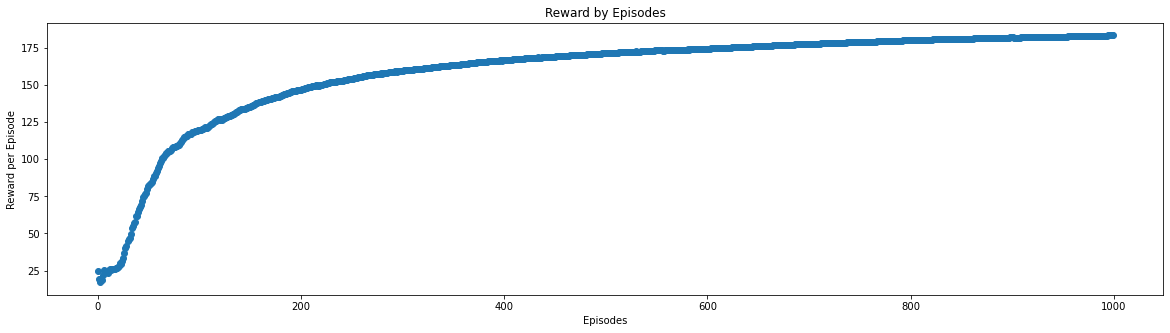

In [68]:
reward_list_dueling = []
total_reward = 0

# print(list(policy_network.parameters())[0])
# iterate over num_episodes number of episodes
for episode in range(num_episodes):
    state = env.reset() # reset the environment for each episode
    done = False 
    while not done:
#         env.render()
        action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
        next_state, reward, done, _ = env.step(action) # take the action in the environment 
        total_reward += reward
        # Observe new state
        if done:
            next_state = None
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # account for if next state is None
        else:
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
        memory.push(experience) # Store the transition in memory
        state = next_state # move to next state 
        
        # optimize the model by updating the weights
        # sample from memory of experiences
        sample_experiences = memory.sample(BATCH_SIZE)
        state_batch, action_batch, reward_batch, non_final_mask, next_state_batch = memory.get_batches(sample_experiences)
        # get q-values, next state q-values and update weights
        agent.optimise_model(policy_network, optimizer, state_batch, action_batch, reward_batch, non_final_mask, next_state_batch) 
        behaviour_policy.update_epsilon() # epislon decay
    reward_list_dueling.append(total_reward/(episode+1)) # store average cumulative reward to plot
        
print("Done training")
env.close()

# plotting the rewards by episodes
fig = plt.figure(figsize=(20, 5))
plt.scatter(range(num_episodes), reward_list_dueling)
plt.xlabel("Episodes")
plt.ylabel("Reward per Episode")
plt.title("Reward by Episodes")
plt.show()

# Implementing Dueling Double DQN

## Hyperparameters and Instances of Classes

In [78]:
# specifying hyperparameters
num_episodes = 1000
CAPACITY = 100000
BATCH_SIZE = 256
GAMMA = 0.999
HIDDEN_SIZE = 64
TARGET_UPDATE = 10

# creating instances of classes
env = gym.make('CartPole-v0') # creating environment
num_states = env.observation_space.shape[0] # number of states = size of observation spae
num_actions = env.action_space.n # number of actions = size of action space

policy_network = Dueling_DQN(num_states, HIDDEN_SIZE, num_actions).to(device) # creating policy network: 2 layered DQN with 1 hidden layer with 64 neurons

target_network = Dueling_DQN(num_states, HIDDEN_SIZE, num_actions).to(device) # creating target network
target_network.load_state_dict(policy_network.state_dict()) # set weights of target network to be the same as policy_network
target_network.eval() # set to evaluation mode

optimizer = optim.Adam(policy_network.parameters(), lr=0.01) # using ADAM as optimizer
behaviour_policy = E_Greedy_Policy(1, 0.001, 0.999) # epsilon greedy policy with starting epsilon of 1, minimum epsilon of 0.001 and decay by 0.999 each episode
memory = ReplayMemory(CAPACITY) # memory with capacity of 10,000
agent = dual_agent(behaviour_policy, num_actions) # setting up agent with epsilon greedy policy and number of actions it can take

## Re-Initialising Memory

In [79]:
# Initialising memory to our capacity
while not memory.memory_initialised():
    state = env.reset() # reset the environment for each episode
    done = False 
    while not done:
        action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
        next_state, reward, done, _ = env.step(action) # take the action in the environment 
        # Observe new state
        if done:
            next_state = None
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # creating experience tuple if next state is None
        else:
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
        memory.push(experience) # Store the transition in memory
        state = next_state # move to next state
print('Done with intialising the memory')

Done with intialising the memory


## Training

Done training


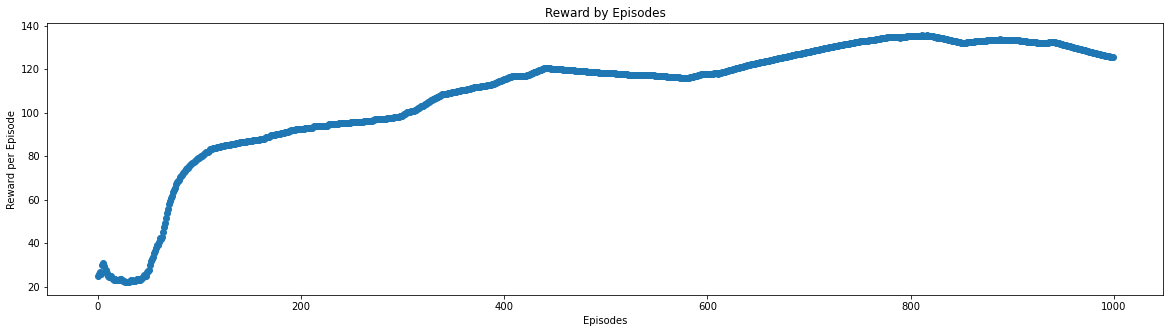

In [80]:
reward_list_dueling_double = []
total_reward = 0

# iterate over num_episodes number of episodes
for episode in range(num_episodes):
    state = env.reset() # reset the environment for each episode
    done = False 
    while not done:
#         env.render()
        action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
        next_state, reward, done, _ = env.step(action) # take the action in the environment 
        total_reward += reward
        # Observe new state
        if done:
            next_state = None
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # account for if next state is None
        else:
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
        memory.push(experience) # Store the transition in memory
        state = next_state # move to next state 
        
        # optimize the model by updating the weights
        # sample from memory of experiences
        sample_experiences = memory.sample(BATCH_SIZE)
        state_batch, action_batch, reward_batch, non_final_mask, next_state_batch = memory.get_batches(sample_experiences)
        # get q-values, next state q-values and update weights
        agent.optimise_model(policy_network, target_network, optimizer, state_batch, action_batch, reward_batch, non_final_mask, next_state_batch) 
        behaviour_policy.update_epsilon() # epislon decay
    reward_list_dueling_double.append(total_reward/(episode+1)) # store average cumulative reward to plot

    # Update the target network, copying all weights and biases in DQN, every TARGT UPDATE number of episodes
    if episode % TARGET_UPDATE == 0:
        target_network.load_state_dict(policy_network.state_dict())
        
print("Done training")
env.close()

# plotting the rewards by episodes
fig = plt.figure(figsize=(20, 5))
plt.scatter(range(num_episodes), reward_list_dueling_double)
plt.xlabel("Episodes")
plt.ylabel("Reward per Episode")
plt.title("Reward by Episodes")
plt.show()

# Comparing Results

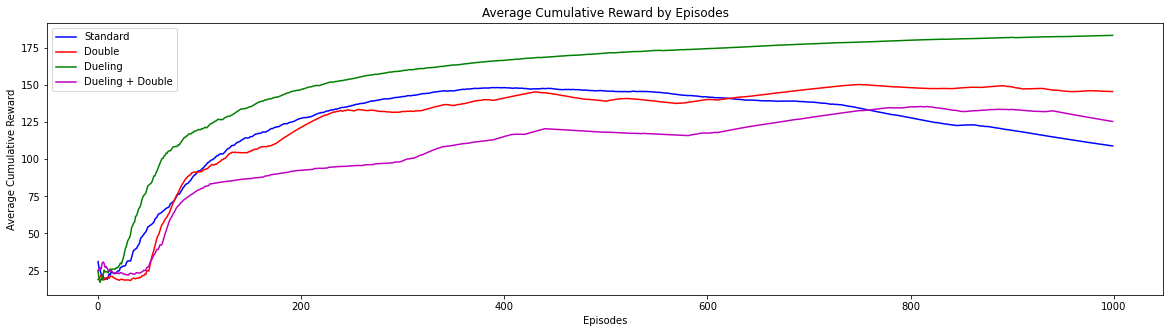

In [88]:
reward_list_dqn = [(reward_list, 'b'), (reward_list_double, 'r'), (reward_list_dueling, 'g'), (reward_list_dueling_double, 'm')]
label = ['Standard', 'Double', 'Dueling', 'Dueling + Double']

fig = plt.figure(figsize=(20, 5))
plt.xlabel("Episodes")
plt.ylabel("Average Cumulative Reward")
plt.title("Average Cumulative Reward by Episodes")

for reward_lists, colour in reward_list_dqn:
    plt.plot(range(num_episodes), reward_lists, c=colour)
plt.legend(labels=label)

# Hyperparameter Tuning on Dueling DQN

In [109]:
# specifying hyperparameters
num_episodes = 1000
CAPACITY = 100000
BATCH_SIZES = [64, 256, 1024]
GAMMA = 0.999
HIDDEN_SIZE = 64

reward_lists = []
for BATCH_SIZE in BATCH_SIZES:
    # creating instances of classes
    env = gym.make('CartPole-v0') # creating environment
    num_states = env.observation_space.shape[0] # number of states = size of observation spae
    num_actions = env.action_space.n # number of actions = size of action space

    policy_network = Dueling_DQN(num_states, HIDDEN_SIZE, num_actions).to(device) # creating policy network: 2 layered DQN with 1 hidden layer with 64 neurons


    optimizer = optim.Adam(policy_network.parameters(), lr=0.01) # using ADAM as optimizer
    behaviour_policy = E_Greedy_Policy(1, 0.001, 0.999) # epsilon greedy policy with starting epsilon of 1, minimum epsilon of 0.001 and decay by 0.999 each episode
    memory = ReplayMemory(CAPACITY) # memory with capacity of 10,000
    agent = Agent(behaviour_policy, num_actions) # setting up agent with epsilon greedy policy and number of actions it can take

    # Initialising memory to our capacity
    while not memory.memory_initialised():
        state = env.reset() # reset the environment for each episode
        done = False 
        while not done:
            action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
            next_state, reward, done, _ = env.step(action) # take the action in the environment 
            # Observe new state
            if done:
                next_state = None
                experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # creating experience tuple if next state is None
            else:
                experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
            memory.push(experience) # Store the transition in memory
            state = next_state # move to next state
    print('Done with intialising the memory')

    reward_list_hyper = []
    total_reward = 0

    # training
    # iterate over num_episodes number of episodes
    for episode in range(num_episodes):
        state = env.reset() # reset the environment for each episode
        done = False 
        while not done:
            action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
            next_state, reward, done, _ = env.step(action) # take the action in the environment 
            total_reward += reward
            # Observe new state
            if done:
                next_state = None
                experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # account for if next state is None
            else:
                experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
            memory.push(experience) # Store the transition in memory
            state = next_state # move to next state 

            # optimize the model by updating the weights
            # sample from memory of experiences
            sample_experiences = memory.sample(BATCH_SIZE)
            state_batch, action_batch, reward_batch, non_final_mask, next_state_batch = memory.get_batches(sample_experiences)
            # get q-values, next state q-values and update weights
            agent.optimise_model(policy_network, optimizer, state_batch, action_batch, reward_batch, non_final_mask, next_state_batch) 
            behaviour_policy.update_epsilon() # epislon decay
        reward_list_hyper.append(total_reward/(episode+1)) # store average cumulative reward to plot

    reward_lists.append(reward_list_hyper)
        
print("Done training")
env.close()

Done with intialising the memory
Done with intialising the memory
Done with intialising the memory
Done training


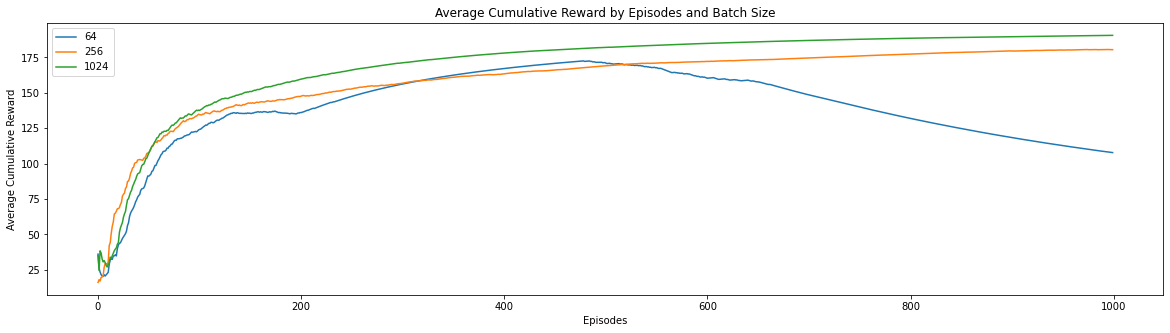

In [110]:
fig = plt.figure(figsize=(20, 5))
plt.xlabel("Episodes")
plt.ylabel("Average Cumulative Reward")
plt.title("Average Cumulative Reward by Episodes and Batch Size")

for reward_lists_hyper in reward_lists:
    plt.plot(range(num_episodes), reward_lists_hyper)
plt.legend(labels=BATCH_SIZES)

# Saving Video of Peformance

In [12]:
import gym
from gym.wrappers import Monitor

# specifying hyperparameters
num_episodes = 1000
CAPACITY = 100000
BATCH_SIZE = 256
GAMMA = 0.999
HIDDEN_SIZE = 1024

# creating instances of classes
env = gym.wrappers.Monitor(gym.make('CartPole-v0'), "./vid", video_callable=lambda episode_id: True,force=True) # creating environment and recording video
num_states = env.observation_space.shape[0] # number of states = size of observation spae
num_actions = env.action_space.n # number of actions = size of action space

policy_network = Dueling_DQN(num_states, HIDDEN_SIZE, num_actions).to(device) # creating dueling dqn

optimizer = optim.Adam(policy_network.parameters(), lr=0.01) # using ADAM as optimizer
behaviour_policy = E_Greedy_Policy(1, 0.001, 0.999) # epsilon greedy policy with starting epsilon of 1, minimum epsilon of 0.001 and decay by 0.999 each episode
memory = ReplayMemory(CAPACITY) # memory with capacity of 10,000
agent = Agent(behaviour_policy, num_actions) # setting up agent with epsilon greedy policy and number of actions it can take


# Initialising memory to our batch size
while not memory.memory_initialised():
    state = env.reset() # reset the environment for each episode
    done = False 
    while not done:
        action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
        next_state, reward, done, _ = env.step(action) # take the action in the environment 
        # Observe new state
        if done:
            next_state = None
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # creating experience tuple if next state is None
        else:
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
        memory.push(experience) # Store the transition in memory
        state = next_state # move to next state
print('Done with intialising the memory')


# iterate over num_episodes number of episodes
for episode in range(num_episodes):
    state = env.reset() # reset the environment for each episode
    done = False 
    while not done:
        action = agent.select_action(state, policy_network) # select an action by behaviour policy (i.e. explore or exploit)
        next_state, reward, done, _ = env.step(action) # take the action in the environment 
        # Observe new state
        if done:
            next_state = None
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), next_state, torch.tensor(float(reward)).unsqueeze(0)) # account for if next state is None
        else:
            experience = Experience(torch.tensor(state).unsqueeze(0), torch.tensor(action).unsqueeze(0), torch.tensor(next_state).unsqueeze(0), torch.tensor(float(reward)).unsqueeze(0)) # if next state is not none
        memory.push(experience) # Store the transition in memory
        state = next_state # move to next state 
        
        # optimize the model by updating the weights
        # sample from memory of experiences
        sample_experiences = memory.sample(BATCH_SIZE)
        state_batch, action_batch, reward_batch, non_final_mask, next_state_batch = memory.get_batches(sample_experiences)
        # get q-values, next state q-values and update weights
        agent.optimise_model(policy_network, optimizer, state_batch, action_batch, reward_batch, non_final_mask, next_state_batch) 
        behaviour_policy.update_epsilon() # epislon decay
        
print("Done training")
env.close()

Done with intialising the memory
Done training
